# Multi-Layer Perceptron (MLP) with Basic Backpropagation (BP) and Backpropagation with Momentum for Classifying Heart Attacks

## Table of Contents
* [Introduction]()
* [1. Basic Backpropagation](#1-basic-backpropagation)
    * [1.1 BP Training](#11-training)
    * [1.2 BP Predicting](#12-predicting)
* [2. Backpropagation with Momentum](#2-backpropagation-with-momentum)
    * [2.1 Training BP with Momentum](#21-training)
    * [2.2 Predicting BP with Momentum](#22-predicting)
* [3. Discussion and Conclusion](#3-discussion-and-conclusion)
* [4. Appendix](#4-appendix)

## Introduction

Cardiovascular diseases, particularly myocardial infarction or heart attacks, remain a leading cause of mortality worldwide. Early and accurate detection of myocardial infarction is critical for prompt intervention and improved patient outcomes. In recent years, advancements in machine learning, particularly neural networks, have shown promising results in medical diagnostics. This report presents an investigation into the application of a Multi-Layer Perceptron (MLP) with basic backpropagation and backpropagation with momentum for the classification of myocardial infarction (heart attacks) based on clinical features extracted from electrocardiogram (EKG) signals. The two main goals of this report are to create MLP neural networks that can classify heart attacks with high accuracy based on EKG signals and to understand the relationship between hyperparameters (alpha, gamma, and number of nuerons in the hidden layer) and optimize them to achieve the highest accuracy. More information about the instructions for the report, dataset, and code implementation can be found in the appendix section.

### Imports

In [38]:
import sys
sys.path.append('/Users/Andy/Documents/git/myocardial_Infarction_Classifier/mlpToolbox')

import pandas as pd
import numpy as np
import mlpBP
import predbp1p

# Data 
P_TR = pd.read_csv(r'datasets/P_TR.csv', header=None)
P_TS = pd.read_csv(r'datasets/P_TS.csv', header=None)
P_TT = pd.read_csv(r'datasets/P_TT.csv', header=None)

T_TR = pd.read_csv(r'datasets/T_TR.csv', header=None)
T_TS = pd.read_csv(r'datasets/T_TS.csv', header=None)
T_TT = pd.read_csv(r'datasets/T_TT.csv', header=None)

P_TR = P_TR.to_numpy()
P_TS = P_TS.to_numpy()
P_TT = P_TT.to_numpy()

T_TR = T_TR.to_numpy()
T_TS = T_TS.to_numpy()
T_TT = T_TT.to_numpy()


## 1. Basic Backpropagation

This section trains a mlp with basic backpropagation using a structure of 47 - H - 1, where H is the number of neurons in the hidden layer. Each of the mlps use a different combinations of H and alpha with the goal of analyzing how their combinations change the error.

### 1.1 Training

In [39]:
maxepoch = 60

# Alphas
alpha1 = 0.01
alpha2 = 0.001
alpha3 = 0.0001

# H
H1 = 50
H2 = 100
H3 = 200


Changing Alphas while H = 50

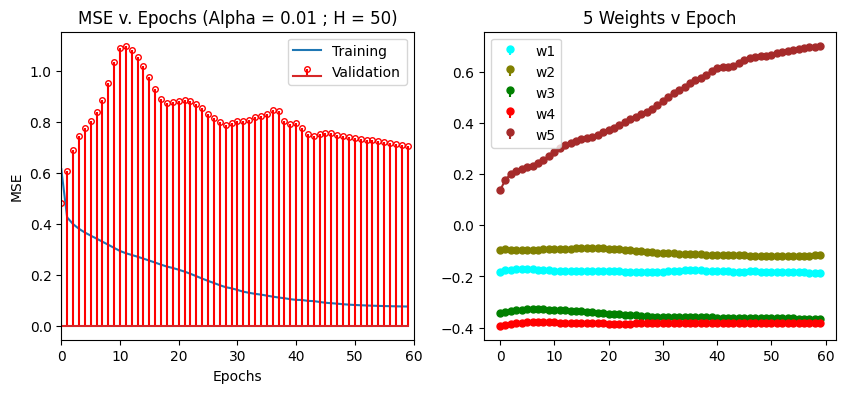

Final Training MSE: [[0.07532881]]
Final Validation MSE: [0.70525247]


In [40]:
W1_1, W2_1, b1_1, b2_1, AE2_1, VE_1 = mlpBP.mlpBasicBP(P_TR, T_TR, H1, alpha1, maxepoch, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_1)
print("Final Validation MSE:", VE_1)

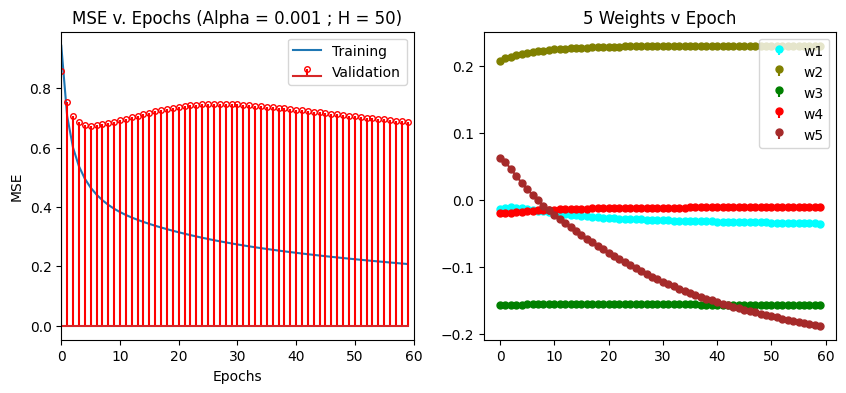

Final Training MSE: [[0.20776794]]
Final Validation MSE: [0.68609546]


In [41]:
W1_2, W2_2, b1_2, b2_2, AE2_2, VE_2 = mlpBP.mlpBasicBP(P_TR, T_TR, H1, alpha2, maxepoch, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2)
print("Final Validation MSE:", VE_2)

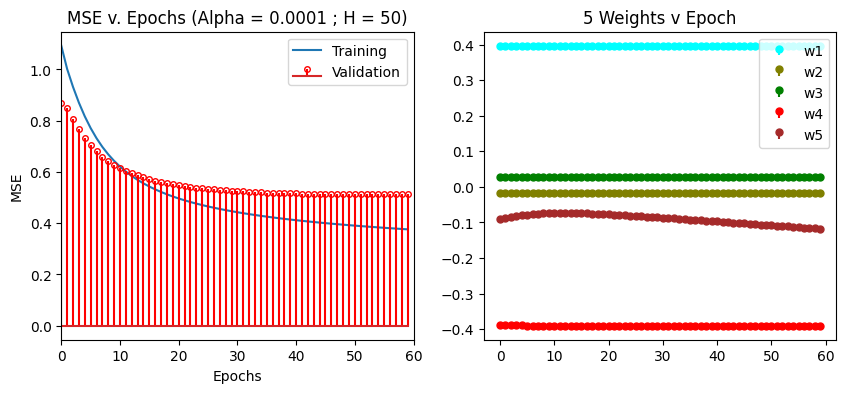

Final Training MSE: [[0.37608511]]
Final Validation MSE: [0.51458721]


In [42]:
W1_3, W2_3, b1_3, b2_3, AE2_3, VE_3 = mlpBP.mlpBasicBP(P_TR, T_TR, H1, alpha3, maxepoch, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_3)
print("Final Validation MSE:", VE_3)

Changing H while Alpha = 0.0001

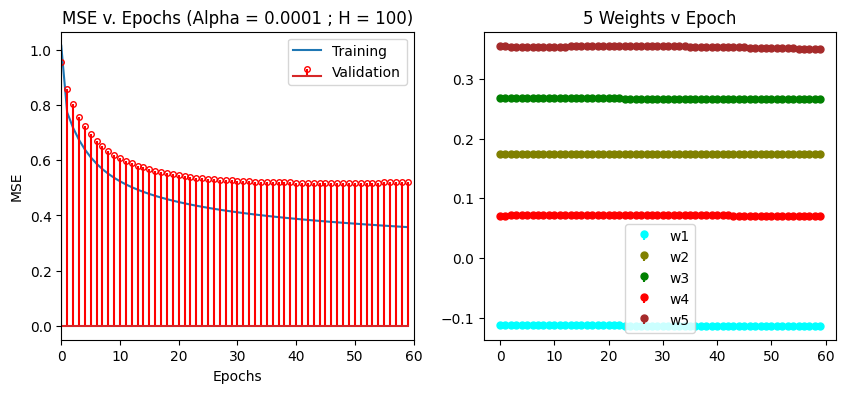

Final Training MSE: [[0.35767205]]
Final Validation MSE: [0.52071468]


In [43]:
W1_3, W2_3, b1_3, b2_3, AE2_3, VE_3 = mlpBP.mlpBasicBP(P_TR, T_TR, H2, alpha3, maxepoch, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_3)
print("Final Validation MSE:", VE_3)

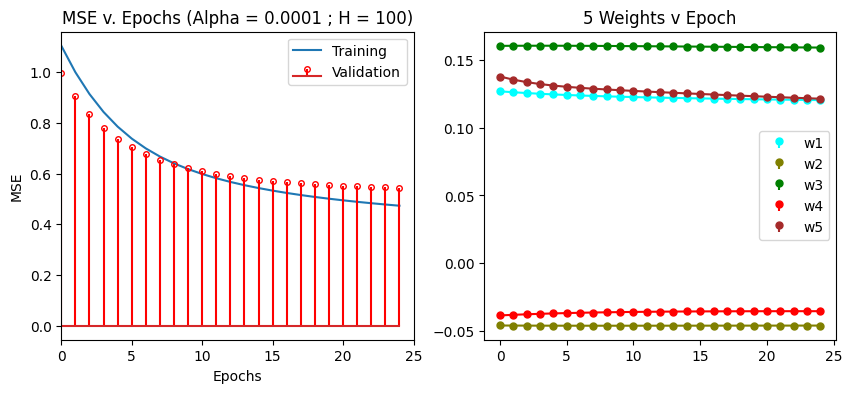

Final Training MSE: [[0.47361347]]
Final Validation MSE: [0.54459301]


In [44]:
predEpochs = 25
W1_final, W2_final, b1_final, b2_final, AE2_final, VE_final = mlpBP.mlpBasicBP(P_TR, T_TR, H2, alpha3, predEpochs, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_final)
print("Final Validation MSE:", VE_final)

### 1.2 Predicting

In [45]:
cols_p = np.shape(P_TS)[1]
hits = 0
for i in range(cols_p):
    
    avg2, hit = predbp1p.predbp1p(W1_final, W2_final, b1_final, b2_final, P_TS[:,i], T_TS[:,i])
    hits += hit
print("Correct Classifications", hits)
print("Incorrect Classifications", cols_p -  hits)
print("Accuracy", hits / cols_p)

Correct Classifications 60
Incorrect Classifications 7
Accuracy 0.8955223880597015


## 2. Backpropagation with Momentum

This section trains a mlp using backpropagation with momentum using a structure of 47 - H - 1, where H is the number of neurons in the hidden layer. Each of the mlps use a different combinations of H, alpha, and gamma with the goal of analyzing how their combinations change the error.

In [46]:
maxepochm = 60

# Alphas
alpha1m = 0.001
alpha2m = 0.0001

# H
H1m = 50
H2m = 100
H3m = 200

# Gammas
ga1 = 0.9
ga2 = 0.8

### 2.1 Training

Using Alpha = 0.001, H = 50, ga = 0.9

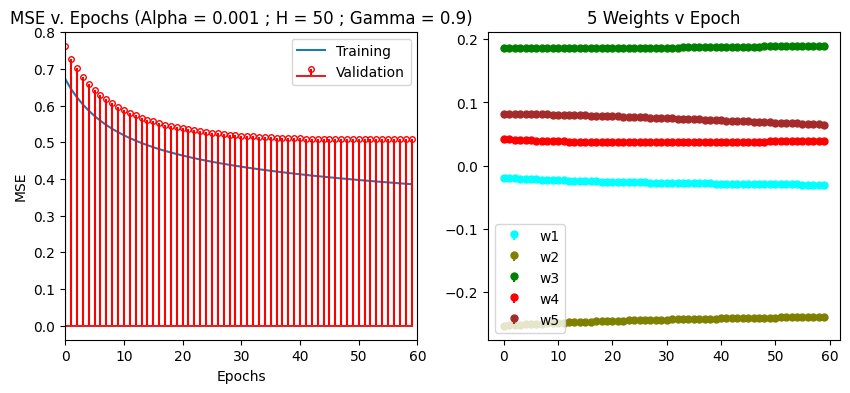

Final Training MSE: [[0.38569936]]
Final Validation MSE: 0.5087085526972962


In [47]:
W1_2_1, W2_2_1, b1_2_1, b2_2_1, AE2_2_1, VE_2_1 = mlpBP.mlpMomentumBP(P_TR, T_TR, H1m, alpha1m, ga1, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_1)
print("Final Validation MSE:", VE_2_1)

Using Alpha = 0.001, H = 100, ga = 0.9

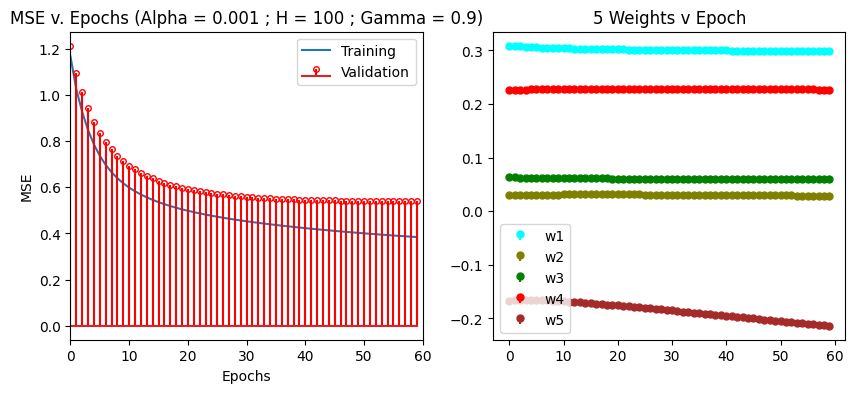

Final Training MSE: [[0.38454219]]
Final Validation MSE: 0.5401914944524876


In [48]:
W1_2_2, W2_2_2, b1_2_2, b2_2_2, AE2_2_2, VE_2_2 = mlpBP.mlpMomentumBP(P_TR, T_TR, H2m, alpha1m, ga1, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_2)
print("Final Validation MSE:", VE_2_2)

Using Alpha = 0.001, H = 200, ga = 0.9

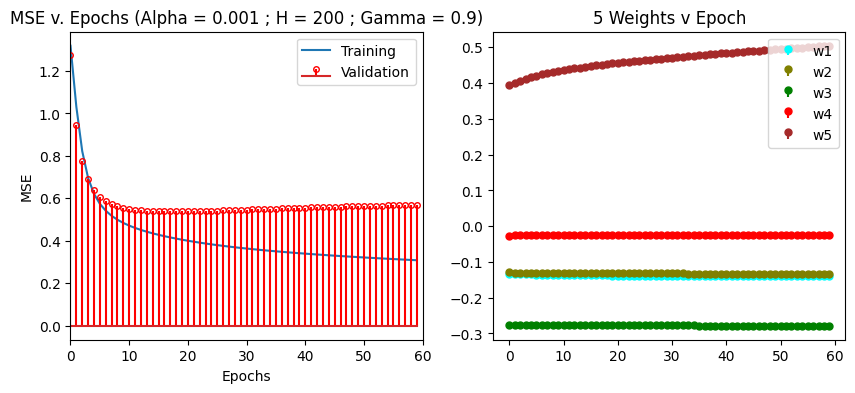

Final Training MSE: [[0.30845623]]
Final Validation MSE: 0.5698097430850114


In [49]:
W1_2_3, W2_2_3, b1_2_3, b2_2_3, AE2_2_3, VE_2_3 = mlpBP.mlpMomentumBP(P_TR, T_TR, H3m, alpha1m, ga1, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_3)
print("Final Validation MSE:", VE_2_3)

Using Alpha = 0.001, H = 100, ga = 0.8

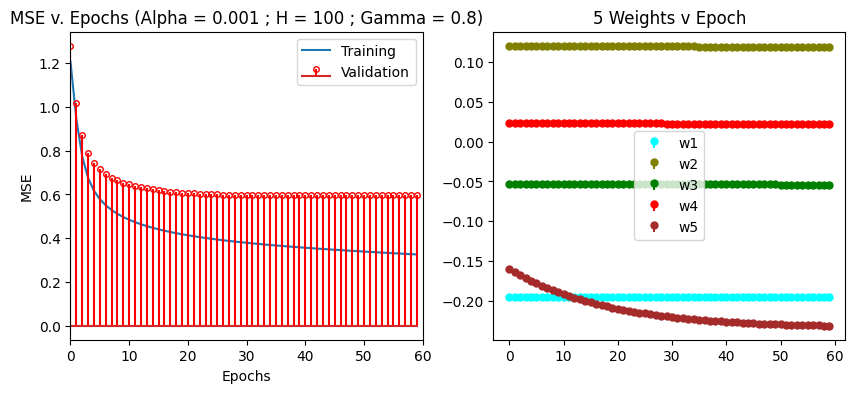

Final Training MSE: [[0.3258725]]
Final Validation MSE: 0.5992550622010714


In [50]:
W1_2_4, W2_2_4, b1_2_4, b2_2_4, AE2_2_4, VE_2_4 = mlpBP.mlpMomentumBP(P_TR, T_TR, H2m, alpha1m, ga2, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_4)
print("Final Validation MSE:", VE_2_4)

Using Alpha = 0.0001, H = 50, ga = 0.8

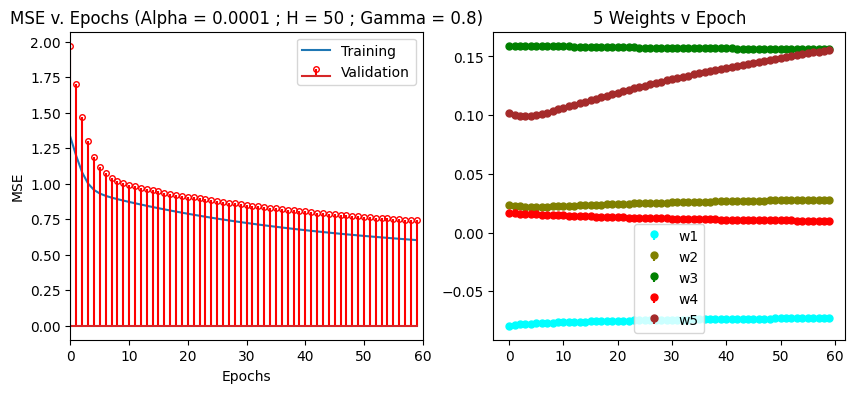

Final Training MSE: [[0.60317406]]
Final Validation MSE: 0.7412140075594155


In [51]:
W1_2_5, W2_2_5, b1_2_5, b2_2_5, AE2_2_5, VE_2_5 = mlpBP.mlpMomentumBP(P_TR, T_TR, H1m, alpha2m, ga2, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_5)
print("Final Validation MSE:", VE_2_5)

Using Alpha = 0.0001, H = 50, ga = 0.9

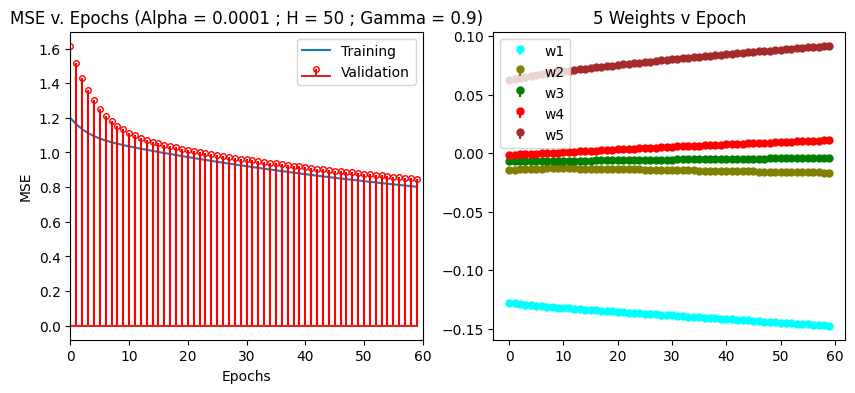

Final Training MSE: [[0.80226032]]
Final Validation MSE: 0.848328301035055


In [52]:
W1_2_6, W2_2_6, b1_2_6, b2_2_6, AE2_2_6, VE_2_6 = mlpBP.mlpMomentumBP(P_TR, T_TR, H1m, alpha2m, ga1, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_6)
print("Final Validation MSE:", VE_2_6)

Using Alpha = 0.0001, H = 50, ga = 0.9

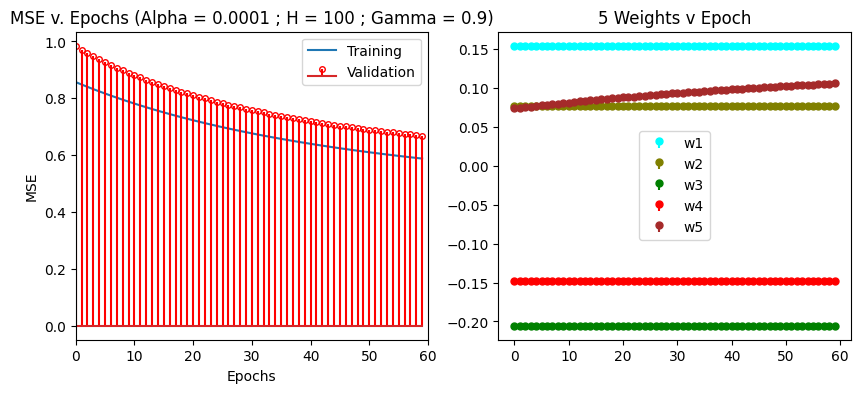

Final Training MSE: [[0.58791231]]
Final Validation MSE: 0.6686236037514556


In [53]:
W1_2_7, W2_2_7, b1_2_7, b2_2_7, AE2_2_7, VE_2_7 = mlpBP.mlpMomentumBP(P_TR, T_TR, H2m, alpha2m, ga1, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_7)
print("Final Validation MSE:", VE_2_7)

Using Alpha = 0.0001, H = 100, ga = 0.8

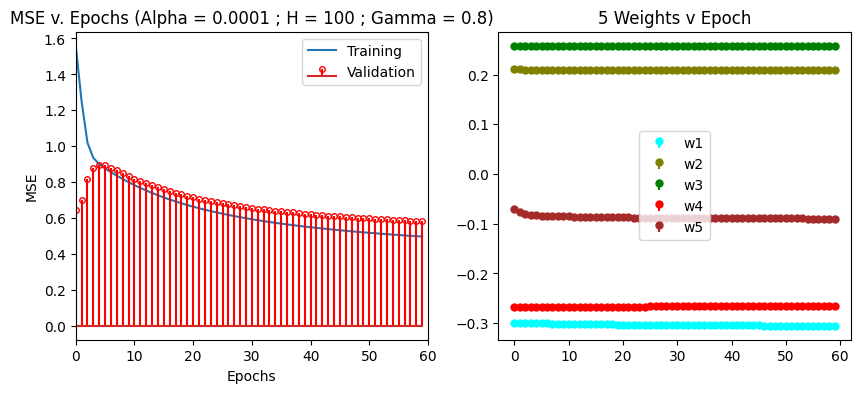

Final Training MSE: [[0.49668191]]
Final Validation MSE: 0.5820384104211449


In [54]:
W1_2_8, W2_2_8, b1_2_8, b2_2_8, AE2_2_8, VE_2_8 = mlpBP.mlpMomentumBP(P_TR, T_TR, H2m, alpha2m, ga2, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_8)
print("Final Validation MSE:", VE_2_8)

Using Alpha = 0.0001, H = 200, ga = 0.8

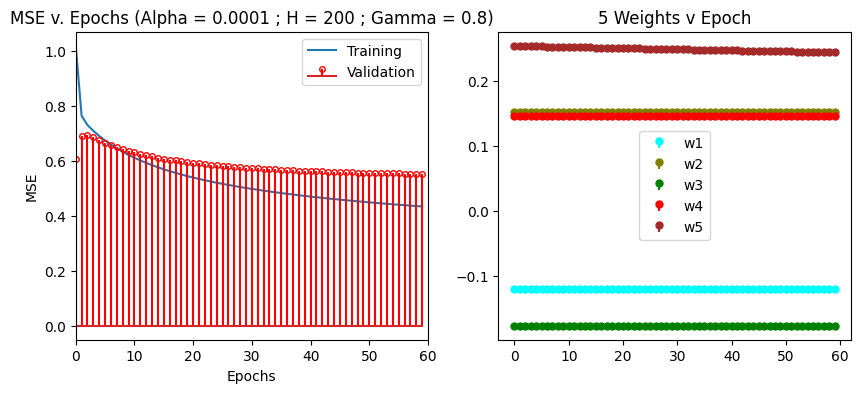

Final Training MSE: [[0.43462716]]
Final Validation MSE: 0.5533480708168869


In [55]:
W1_2_9, W2_2_9, b1_2_9, b2_2_9, AE2_2_9, VE_2_9 = mlpBP.mlpMomentumBP(P_TR, T_TR, H3m, alpha2m, ga2, maxepochm, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_9)
print("Final Validation MSE:", VE_2_9)

Final Training using best performing model but cutting using less training epochs. Using Alpha = 0.001, H = 50, ga = 0.9

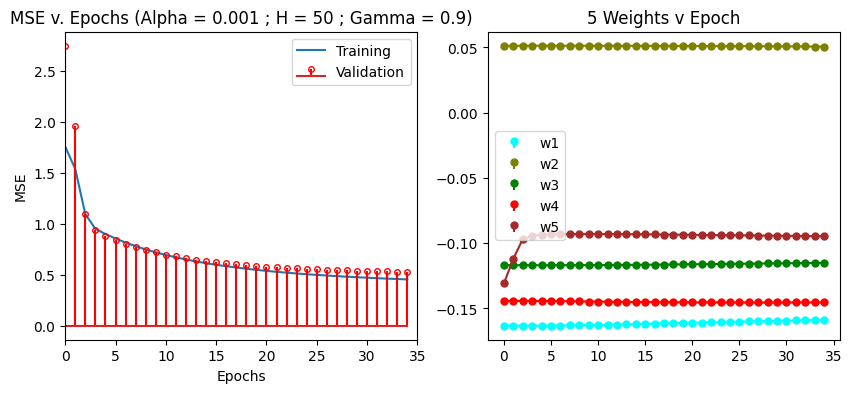

Final Training MSE: [[0.4549774]]
Final Validation MSE: 0.5301209736338357


In [84]:
momentumEpochs = 35

W1_2_final, W2_2_final, b1_2_final, b2_2_final, AE2_2_final, VE_2_final = mlpBP.mlpMomentumBP(P_TR, T_TR, H1m, alpha1m, ga1, momentumEpochs, output_layers=1, VALXX=P_TT, VALY=T_TT)
print("Final Training MSE:", AE2_2_final)
print("Final Validation MSE:", VE_2_final)

### 2.2 Predicting

In [85]:
cols_p = np.shape(P_TS)[1]
hits = 0
for i in range(cols_p):
    
    avg2, hit = predbp1p.predbp1p(W1_2_final, W2_2_final, b1_2_final, b2_2_final, P_TS[:,i], T_TS[:,i])
    hits += hit
print("Correct Classifications", hits)
print("Incorrect Classifications", cols_p -  hits)
print("Accuracy", hits / cols_p)

Correct Classifications 61
Incorrect Classifications 6
Accuracy 0.9104477611940298


## 3. Discussion and Conclusion

In the pursuit of developing accurate and robust models for the detection of myocardial infarction through electrocardiogram (EKG) signals, our study employed multiple Multi-Layer Perceptrons (MLPs) with varying configurations. The structured architectures, specifically 47 input nodes, a variable number of neurons in the hidden layer (H), and 1 output node, were trained using both basic backpropagation and backpropagation with momentum. The convergence of learning rates (alpha), hidden layer neurons (H), and momentum coefficients (gamma) were explored to comprehend their impact on the model's performance.

For the MLP employing basic backpropagation, the model with alpha = 0.0001 and H = 100 exhibited notable performance. Training over 60 epochs and later fine-tuning with 25 epochs, it achieved a final training Mean Squared Error (MSE) of 0.47 and a validation error of 0.544. Remarkably, this model demonstrated an 89% accuracy on the test set, showcasing its proficiency in generalizing to new data.

The backpropagation with momentum variant, particularly with alpha = 0.001, H = 50, and gamma = 0.9, emerged as the top-performing model. Across 60 initial epochs and additional training with 35 epochs, it attained a final training MSE of 0.454 and a validation error of 0.53. When applied to the test set, this model showcased an accuracy ranging between 88% to 91%.

It's crucial to highlight that the choice of the best-performing model was a meticulous process, considering not only the lowest training and validation errors but also consistency across multiple executions and efficient execution times. Some models with slight variations in hyperparameters achieved similar performance, emphasizing the robustness of the approach.

In conclusion, our study demonstrates the potential of MLPs in myocardial infarction detection, offering insights into the intricate interplay of hyperparameters. As we delve deeper into the synergy between machine learning and healthcare, the outcomes of this study contribute to the growing body of knowledge propelling the integration of artificial intelligence for improved cardiac diagnostics. The journey toward enhancing the reliability and interpretability of these models continues, with a shared commitment from the scientific and medical communities alike.

## 4. Appendix